# 1. Business Understanding
##### for the first business question is going take a brief compare between the mean price accross two city, then for the rest of business question are foucs on seattle data

- 1. compare the two city which city have a average higher price and how they perform over the time
- 2. what elements effect the price of the hosue the most
- 3. Base on the element we find on 1 what element effect price in uptrend and how

# 2. Data Understanding

- calendar.csv contians data for the whether the date is available for book and how much it wil cost
- listing.csv contains many detailed data for each lsiting Id
- review.csv contains reviews for each host by who and the date it was maded

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn import linear_model

pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)  # 最多显示数据的行数

boston_calendar = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\calendar.csv')
boston_listing = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\listings.csv')
boston_reviews = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Boston Airbub Open Data\reviews.csv')

seattle_calendar = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\calendar.csv')
seattle_listing = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\listings.csv')
seattle_reviews = pd.read_csv(r'D:\金融股票\Udacity\Data Science\1. Intro to Data Science\Data\Seattle Airbnb Open Data\reviews.csv')

In [2]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
seattle_listing.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
seattle_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
seattle_listing.select_dtypes(include=['object']).describe()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3818,3816,3816,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818,3818,3817,3818,3818,3818,3818,2009,1517,1866,2788,3818,3818,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,116,2,2,1442,81,87,17,7,2,28,1,7,1,1,2,16,3,5,3284,273,395,356,46,118,45,34,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/241032,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a1.muscache.com/ac/pictures/67560560/c...,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,{},$150.00,$500.00,"$2,500.00",$100.00,$50.00,$0.00,today,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,1,1,1,1,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,595,3809,2997,30,351,397,794,3810,3817,420,3818,3810,3818,3818,3412,1733,2541,3657,45,162,94,66,348,310,2048,706,3818,3818,25,94,3818,3818,3227,1417,3497,3443


Text(0.5, 1.0, 'listing NaN')

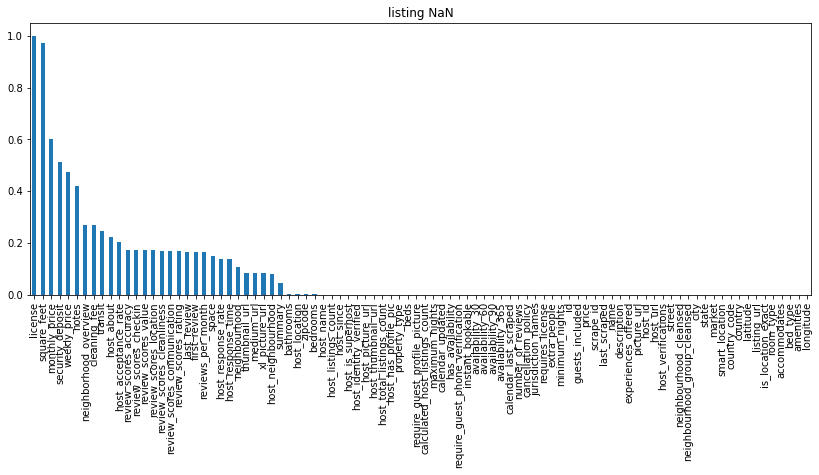

In [7]:
'''
1. drop check NaN value then drop and fix data
'''
plt.figure(figsize=(14,5))
seattle_listing.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('listing NaN')

Text(0.5, 1.0, 'Listing NaN Top 10')

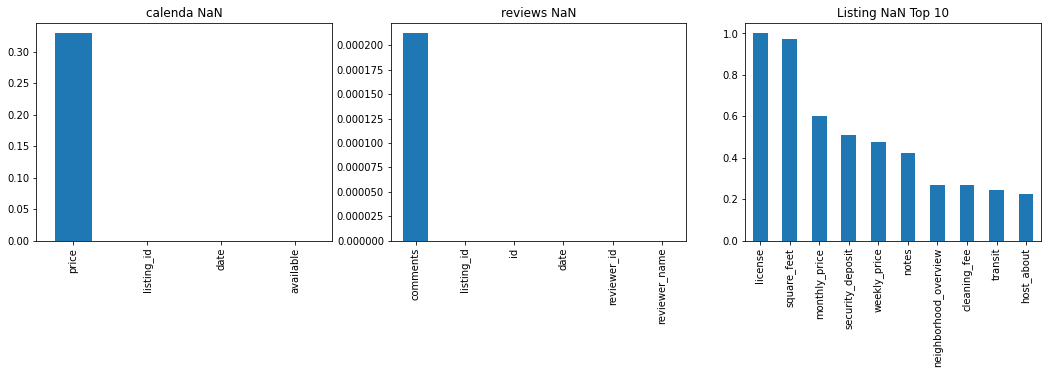

In [8]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
seattle_calendar.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('calenda NaN')

plt.subplot(1,3,2)
seattle_reviews.isnull().mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('reviews NaN')

plt.subplot(1,3,3)
seattle_listing.isnull().mean().sort_values(ascending=False)[:10].plot(kind = 'bar')
plt.title('Listing NaN Top 10')

As we see in the above diagram, there are missing values within our data. Especially on listing.csv for col 'license' and 'square_feet' we have over 90% of empty data. As a approach I will remove those w col and keep the rest, because as we can see even throught there are empty values but those col are still valuable to dig into.

But on the other hand there are some col with value but less usefull, such as: listing_url. For those I decide to drop too. 

# 3. Data Preparation/ Data Wrangling

- make all objet to number
- create new col for analysis
- change categorig data to dummy

### seattle data

In [9]:
def toNumber(x):
    if type(x) == str:
        x = float(x.replace('\n','').replace(',','').replace('$','').replace('%',''))
    elif type(x) == float:
        x = 0

    return x

def get_list(x):
    list = []
    for method in x.split("', '"):
        method = method.replace("['",'').replace("']",'')
        list.append(method)

    return list

def get_list_amenities(x):
    list = []
    for method in x.split(','):
        method = method.replace('{','').replace('}','').replace('"','')
        list.append(method)

    return list

# drop useless cols
urls = []
for col in seattle_listing.columns:
    words = col.split('_')
    if 'url' in words:
        urls.append(col)
        
ToDrop = ['license','square_feet','scrape_id',
          'experiences_offered','street','market',
          'smart_location','country_code','country',
          'last_scraped','host_location','calendar_updated',
          'calendar_last_scraped','host_neighbourhood','neighbourhood',
          'host_total_listings_count','first_review','last_review']
ToDrop_list = urls + ToDrop

seattle_listing = seattle_listing.drop(columns = ToDrop_list,
                                       axis = 1)

# rename col get ready for merge
seattle_listing = seattle_listing.rename(columns = {'id':'listing_id'})
seattle = pd.merge(seattle_calendar, seattle_listing, on = 'listing_id')
seattle = seattle.drop(columns = 'price_x',axis = 1)


# convert host_since  to host_since_year
seattle['host_since'] = seattle['host_since'].fillna('0')
seattle['host_since_year'] = seattle['host_since'].apply(lambda x: int(x.split('-')[0]))
seattle = seattle.drop(columns = 'host_since',
                            axis = 1)

# convert date to month and year
seattle['month'] = seattle['date'].apply(lambda x: int(x.split('-')[1]))
seattle['year'] = seattle['date'].apply(lambda x: int(x.split('-')[0]))
seattle = seattle.drop(columns = 'date',
                            axis = 1)


# since words and long sentence are quite different compare with object and number
# split data into available, available_words and not-available, not-available_words
words_cols = ['name','summary','space','description','neighborhood_overview','notes','transit','host_about']

av_seattle = seattle.query('available == "t"').drop(columns = words_cols, axis = 1)
avw_seattle = seattle.query('available == "t"')[words_cols]
nav_seattle = seattle.query('available == "f"').drop(columns = words_cols, axis = 1)
navw_seattle = seattle.query('available == "f"')[words_cols]    
    
'''
convert cols to dummy
'''
# change host_verifications to dummy
# get all the unique method of verification
host_verifications = []
for methods in av_seattle.host_verifications.unique():
    methods = methods.split("', '")
    l = []
    for method in methods:
        method = method.replace("['",'').replace("']",'')
        if method not in host_verifications:
            host_verifications.append(method)
            
# create new cols store dummy variable
for c in host_verifications:
    av_seattle[c] = 0
    
# change 'host_verifications' col to right list format
av_seattle['host_verifications'] = av_seattle.host_verifications.apply(lambda x: get_list(x))

# sign value for each dummy col
row = 0
fin = 1
start = time.time()
for val_list in av_seattle.host_verifications.values:
    for val in val_list:
        av_seattle[val].iloc[row] = 1
    row += 1
    if row % 10000 == 0:
        print('finish {}, time = {}'.format(fin,time.time() - start))
        fin += 1
    
# rename all the col with right name and drop 'host_verifications'
# create rename list to store all the right name
rename = []
for name in host_verifications:
    name = 'host_verifications' + '_' + name
    rename.append(name)
# create rename dict to store right pair of old name and new name 
rename_dict = {}
for val in zip(host_verifications,rename):
    rename_dict[val[0]] = val[1] 
av_seattle = av_seattle.rename(columns = rename_dict)
# drop
av_seattle = av_seattle.drop(columns = 'host_verifications',
                axis = 1)


# change amenities to dummy
# get all the unique method of amenities
amenities = []
for methods in av_seattle.amenities.unique():
    methods = methods.split(',')
    for method in methods:
        method = method.replace('{','').replace('}','').replace('"','')
        if method not in amenities:
            amenities.append(method)

# create new cols store dummy variable
for c in amenities:
    av_seattle[c] = 0

# change 'amenities' col to right list format
av_seattle['amenities'] = av_seattle['amenities'].apply(lambda x: get_list_amenities(x))

# sign value for each dummy col
row = 0
fin = 1
start = time.time()
for val_list in av_seattle.amenities.values:
    for val in val_list:
        av_seattle[val].iloc[row] = 1
    row += 1
    if row % 10000 == 0:
        print('finish {}, time = {}'.format(fin,time.time() - start))
        fin += 1

# rename all the col with right name and drop 'amenities'
# create rename list to store all the right name
rename = []
for name in amenities:
    name = 'amenities' + '_' + name
    rename.append(name)
# create rename dict to store right pair of old name and new name
rename_dict = {}
for val in zip(amenities,rename):
    rename_dict[val[0]] = val[1]
av_seattle = av_seattle.rename(columns = rename_dict)
# drop
av_seattle = av_seattle.drop(columns = 'amenities',
                axis = 1)

# convert the rest categorical to dummy
dummy_col = ['host_response_time','room_type','property_type','neighbourhood_cleansed',
             'neighbourhood_group_cleansed','city','state','bed_type','jurisdiction_names',
             'cancellation_policy','host_is_superhost','host_has_profile_pic','host_identity_verified',
             'is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture',
             'require_guest_phone_verification']
av_seattle = pd.concat([av_seattle.drop(dummy_col,axis = 1),pd.get_dummies(av_seattle[dummy_col])],axis=1)



c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


finish 1, time = 35.97576594352722
finish 2, time = 73.73307371139526
finish 3, time = 110.43109798431396
finish 4, time = 145.06056427955627
finish 5, time = 180.41204977035522
finish 6, time = 217.5294063091278
finish 7, time = 252.32243537902832
finish 8, time = 288.8532271385193
finish 9, time = 326.66664958000183
finish 10, time = 363.97475600242615
finish 11, time = 399.5062234401703
finish 12, time = 433.48131251335144
finish 13, time = 467.7879111766815
finish 14, time = 497.1698079109192
finish 15, time = 535.2385184764862
finish 16, time = 572.4929287433624
finish 17, time = 609.7469716072083
finish 18, time = 640.5715239048004
finish 19, time = 671.950591802597
finish 20, time = 707.094190120697
finish 21, time = 742.1774098873138
finish 22, time = 777.3992917537689
finish 23, time = 811.2836260795593
finish 24, time = 846.71755194664
finish 25, time = 876.2668619155884
finish 26, time = 908.7445724010468
finish 27, time = 946.7686011791229
finish 28, time = 980.519720554351

In [10]:
# fillna with zero and find all the object and change them to right format
av_seattle = av_seattle.fillna(0)

obj_col = []
for col in av_seattle.columns:
    if av_seattle[col].dtypes == 'object':
        obj_col.append(col)
print(obj_col)

drop = ['available', 'host_name']
for c in drop:
    obj_col.remove(c)
print(obj_col)

for change in obj_col:
    av_seattle[change] = av_seattle[change].apply(lambda x: toNumber(x))

cleaned_av_seattle = av_seattle.copy()

['available', 'host_name', 'host_response_rate', 'host_acceptance_rate', 'host_verifications', 'zipcode', 'amenities', 'price_y', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
['host_response_rate', 'host_acceptance_rate', 'host_verifications', 'zipcode', 'amenities', 'price_y', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']


### boston data

In [11]:
def toNumber(x):
    if type(x) == str:
        x = float(x.replace('\n','').replace(',','').replace('$',''))
    elif type(x) == float:
        x = 0

    return x

# rename col get ready for merge
boston_listing = boston_listing.rename(columns = {'id':'listing_id'})
boston = pd.merge(boston_calendar, boston_listing, on = 'listing_id')
boston = boston.drop(columns = 'price_x',axis = 1)


# convert host_since  to host_since_year
boston['host_since'] = boston['host_since'].fillna('0')
boston['host_since_year'] = boston['host_since'].apply(lambda x: int(x.split('-')[0]))
boston = boston.drop(columns = 'host_since',
                            axis = 1)

# convert date to month and year
boston['month'] = boston['date'].apply(lambda x: int(x.split('-')[1]))
boston['year'] = boston['date'].apply(lambda x: int(x.split('-')[0]))
boston = boston.drop(columns = 'date',
                            axis = 1)

# split data to avaviable and not avaiable
av_boston = boston.query('available == "t"')
nav_boston = boston.query('available == "f"')

# fill all the null value with 0 and make them digit
boston_clean = av_boston[['price_y','month','year','review_scores_accuracy','review_scores_cleanliness',
                          'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

boston_clean = boston_clean.fillna('0')
for col in boston_clean.columns:
    boston_clean[col] = boston_clean[col].apply(lambda x: toNumber(x))

# 4. Analysis

## 4.1 compare the two city which city have a average higher price and how they perform over the time

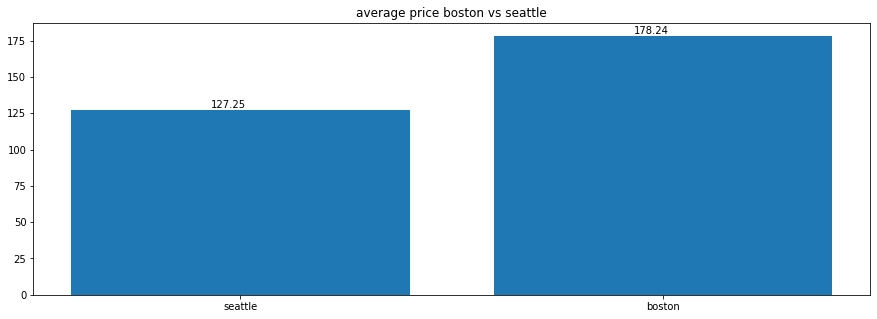

In [45]:
plt.figure(figsize=(15,5))

value = [cleaned_av_seattle['price_y'].mean(),boston_clean['price_y'].mean()]
plt.bar(['seattle','boston'],
        value)
plt.title('average price boston vs seattle')
for i in range(2):
    string = '{:0.2f}'.format(value[i])
    
    plt.text(i-0.07,
             value[i] + 3.5,
             string,
             va = 'center')

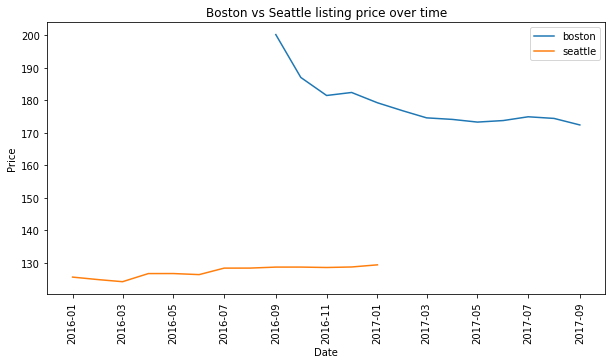

In [46]:
plt.figure(figsize=(10,5))

bos = boston_clean.groupby(['year','month']).mean().reset_index()[['month','price_y','year']]
bos['year_month'] = bos['year'].apply(str) + '_' + bos['month'].apply(str)
bos['year_month'] = pd.to_datetime(bos['year_month'],format='%Y_%m')

sea = cleaned_av_seattle.groupby(['year','month']).mean().reset_index()[['month','price_y','year']]
sea['year_month'] = sea['year'].apply(str) + '_' + sea['month'].apply(str)
sea['year_month'] = pd.to_datetime(sea['year_month'],format='%Y_%m')

plt.plot(bos['year_month'],
         bos['price_y'],
         label = 'boston')
plt.xticks(rotation=90) 


plt.plot(sea['year_month'],
         sea['price_y'],
         label = 'seattle')
plt.xticks(rotation=90) 

plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Boston vs Seattle listing price over time')
plt.legend()

Text(0.5, 1.0, 'Seattle listing price over time')

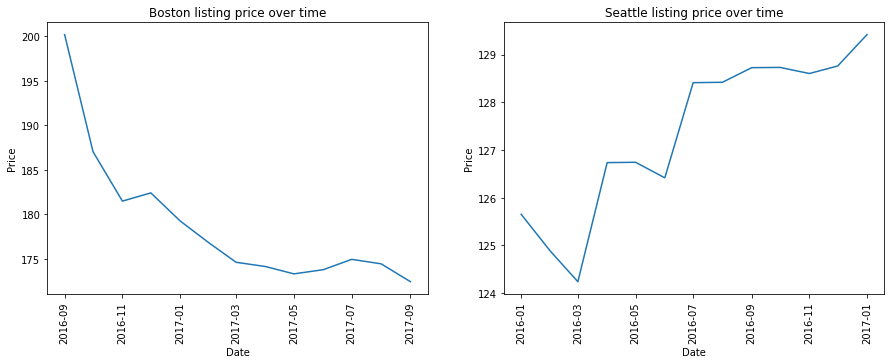

In [47]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(bos['year_month'],
         bos['price_y'],
         label = 'boston')
plt.xticks(rotation=90) 
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Boston listing price over time')

plt.subplot(1,2,2)
plt.plot(sea['year_month'],
         sea['price_y'],
         label = 'seattle')
plt.xticks(rotation=90) 
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Seattle listing price over time')

## 4.2 what elements effect seattle's price of the hosue the most

here we are going to find out the element effect the price tag the most

### 2.1 correlation 

In [48]:
# all the col will be use to answer this question expect : listing_id,available,host_name,host_id,price_y
remove = ['listing_id','available','host_name','host_id','weekly_price','monthly_price']
cols = list(cleaned_av_seattle.columns)
for c in remove:
    cols.remove(c)
df41 = cleaned_av_seattle[cols]

corrs = df41.corr()
print('correlation:')
print(corrs)

correlation:
                                                  host_response_rate  host_acceptance_rate  host_listings_count   zipcode  latitude  longitude  accommodates  bathrooms  bedrooms      beds   price_y  security_deposit  cleaning_fee  guests_included  extra_people  minimum_nights  maximum_nights  availability_30  availability_60  availability_90  availability_365  number_of_reviews  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  reviews_per_month  host_since_year     month          year  host_verifications_email  host_verifications_phone  host_verifications_reviews  host_verifications_kba  host_verifications_facebook  host_verifications_linkedin  host_verifications_jumio  host_verifications_google  host_verifications_manual_offline  host_verifications_amex  host_verifications_manual_online  host_verifications_sent_id  host_v

Text(0.5, 1.0, 'All element toward Price')

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 

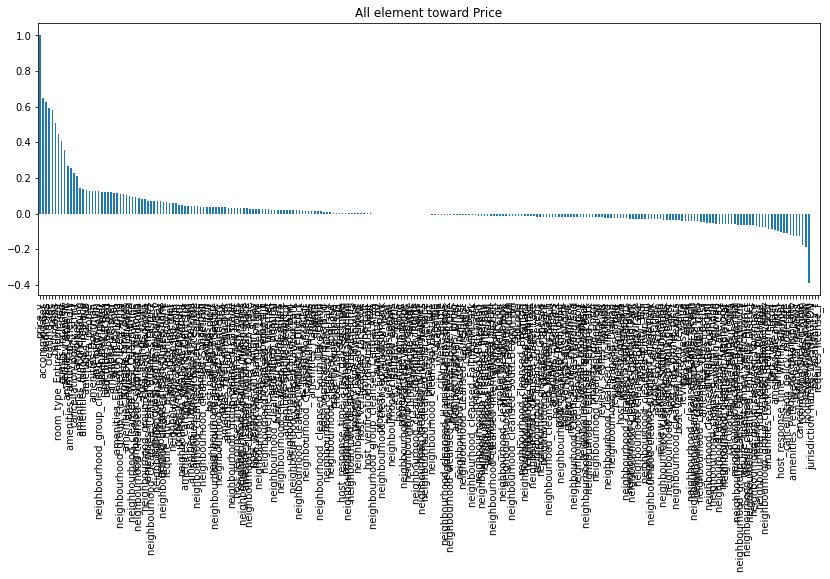

In [49]:
'''
Plot all the value with their correlation to price
'''
plt.figure(figsize=(14,5))
corrs['price_y'].sort_values(ascending=False).plot(kind = 'bar')
plt.title('All element toward Price')

Text(0.5, 1.0, 'Bottom 10')

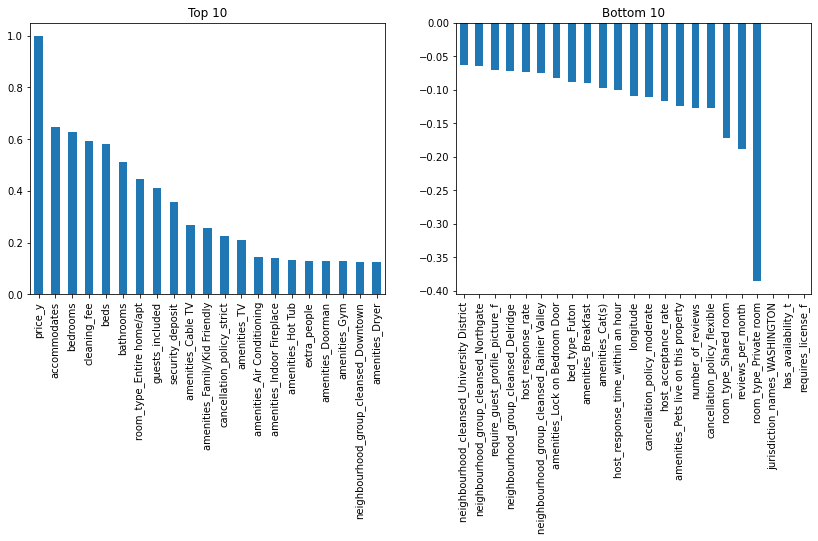

In [50]:
'''
the above graph is real messy, so here we are only going to take a look at the top 20 and bottom 20
'''
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
corrs['price_y'].sort_values(ascending=False)[:21].plot(kind = 'bar')
plt.title('Top 10')

plt.subplot(1,2,2)
corrs['price_y'].sort_values(ascending=False)[-23:].plot(kind = 'bar')
plt.title('Bottom 10')

- according to the above graph we can see that accommodates,bedroom,cleaning_fee,beds and bathroom contribute the most toward price of listing. 
- on the other hand room_type_private, share, cancellation_policy, review_per_month contribute toward negitve price of listing

### 2.2 ML

In [51]:
target = df41['price_y']
feature = df41.drop(columns = 'price_y')
# split data and set 30% test data
feature_train, feature_test, target_train, target_test = train_test_split(feature,
                                                                          target,
                                                                          test_size=0.3,
                                                                          random_state=42)

#train RF regressor model
RAND_STATE = 42
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(feature_train,target_train)

traget_train_preds = forest.predict(feature_train)
traget_test_preds = forest.predict(feature_test)

print('model score train: %.3f, test: %.3f' % (
        forest.score(feature_train,target_train),
        forest.score(feature_test,target_test)))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(target_train, traget_train_preds),
        mean_squared_error(target_test, traget_test_preds)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(target_train, traget_train_preds),
        r2_score(target_test, traget_test_preds)))

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


model score train: 1.000, test: 1.000
MSE train: 0.029, test: 0.032
R^2 train: 1.000, test: 1.000


In [52]:
headers = ["name", "score"]
importance = pd.DataFrame([feature_train.columns,forest.feature_importances_],headers).T.sort_values(by = 'score',ascending=False)
importance.head()

,name,score
8,bedrooms,0.364618
7,bathrooms,0.1241
95,room_type_Entire home/apt,0.044486
11,cleaning_fee,0.031632
10,security_deposit,0.025579


Text(0.5, 1.0, 'bottom 10')

c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\86130\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 38597 missing from current font.
  font.set_text(s, 

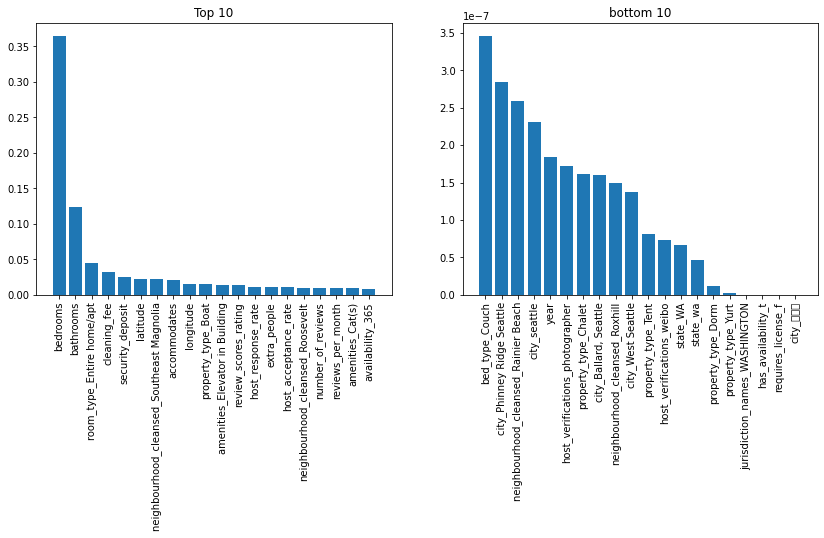

In [53]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.bar(importance['name'][:20],
         importance['score'][:20])
plt.xticks(rotation=90) 
plt.title('Top 10')

plt.subplot(1,2,2)
plt.bar(importance['name'][-20:],
        importance['score'][-20:])
plt.xticks(rotation=90) 
plt.title('bottom 10')

## 4.3 Base on the element we find on 1 what element effect price in downtrend and how

Base on the correlation plot we know that: room_type_private, share, cancellation_policy, review_per_month have negtive correlation with price
Base on the ML we know that: neighbhood, host_verification, amenites_wash/dryer have less effect on price
And here I will create visual graph of those element vs price to get a better understanding of how those effect price

In [61]:
positve = cleaned_av_seattle[['price_y','accommodates','bedrooms','cleaning_fee','beds',
                                   'bathrooms','room_type_Entire home/apt','security_deposit','latitude']]

accommodation = positve.groupby('accommodates').mean().reset_index()[['accommodates','price_y']]
bedroom = positve.groupby('bedrooms').mean().reset_index()[['bedrooms','price_y']]
# drop first row becuase 0 fee listing can bring bias to the data
cleaning_fee = positve.groupby('cleaning_fee').mean().reset_index().iloc[1: , :][['cleaning_fee','price_y']]
bed = positve.groupby('beds').mean().reset_index()[['beds','price_y']]
bathroom = positve.groupby('bathrooms').mean().reset_index()[['bathrooms','price_y']]

room_type = positve.groupby('room_type_Entire home/apt').mean().reset_index()[['room_type_Entire home/apt','price_y']]
sec = positve.groupby('security_deposit').mean().reset_index()[['security_deposit','price_y']]
latitude = positve.groupby('latitude').mean().reset_index()[['latitude','price_y']]

### element from coeff

Text(0.5, 0, 'N of bathroomss')

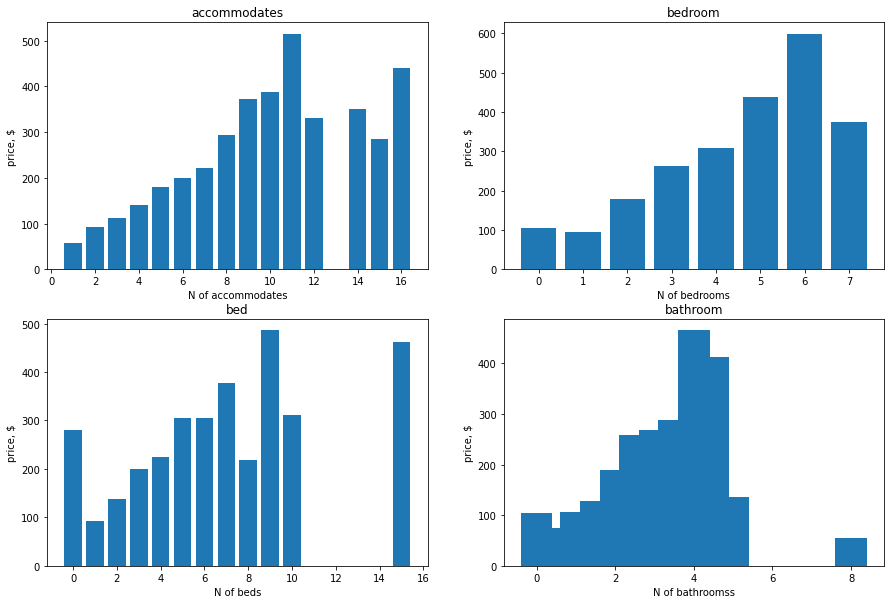

In [55]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.bar(accommodation['accommodates'],
        accommodation['price_y'])
plt.title('accommodates')
plt.ylabel('price, $')
plt.xlabel('N of accommodates')

plt.subplot(2,2,2)
plt.bar(bedroom['bedrooms'],
        bedroom['price_y'])
plt.title('bedroom')
plt.ylabel('price, $')
plt.xlabel('N of bedrooms')

plt.subplot(2,2,3)
plt.bar(bed['beds'],
        bed['price_y'])
plt.title('bed')
plt.ylabel('price, $')
plt.xlabel('N of beds')

plt.subplot(2,2,4)
plt.bar(bathroom['bathrooms'],
        bathroom['price_y'])
plt.title('bathroom')
plt.ylabel('price, $')
plt.xlabel('N of bathroomss')

Text(0.5, 1.0, 'cleaning_fee')

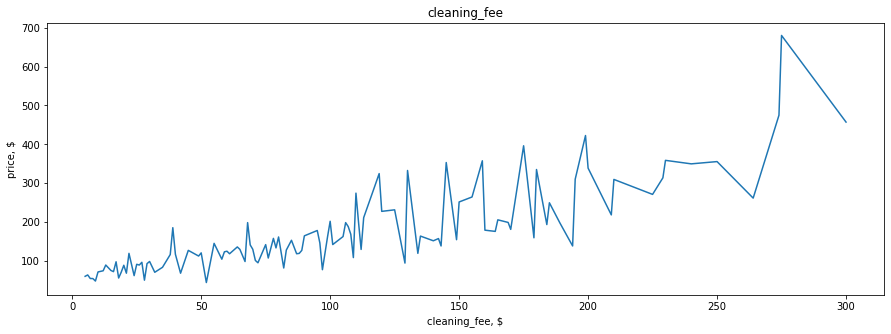

In [56]:
plt.figure(figsize=(15,5))

plt.plot(cleaning_fee['cleaning_fee'],
         cleaning_fee['price_y'])
plt.ylabel('price, $')
plt.xlabel('cleaning_fee, $')
plt.title('cleaning_fee')

### element from ML

Text(0.5, 0, 'latitude')

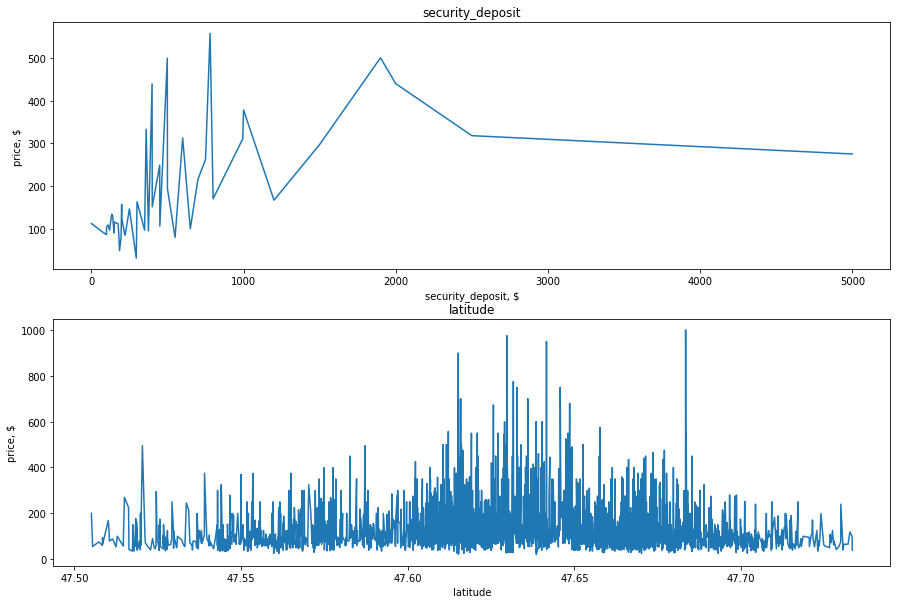

In [63]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(sec['security_deposit'],
         sec['price_y'])
plt.title('security_deposit')
plt.ylabel('price, $')
plt.xlabel('security_deposit, $')

plt.subplot(2,1,2)
plt.plot(latitude['latitude'],
         latitude['price_y'])
plt.title('latitude')
plt.ylabel('price, $')
plt.xlabel('latitude')

Text(0.5, 1.0, 'Entire home/apt')

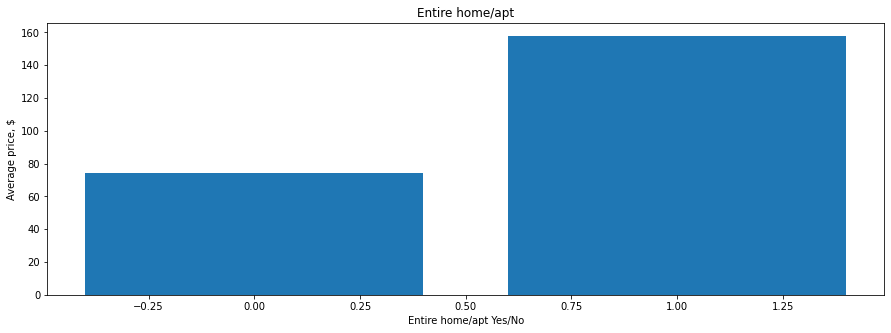

In [59]:
plt.figure(figsize=(15,5))

plt.bar(room_type['room_type_Entire home/apt'],
        room_type['price_y'])
plt.ylabel('Average price, $')
plt.xlabel('Entire home/apt Yes/No')
plt.title('Entire home/apt')

# 5. conclusion

- In this workbook we first try to compare the averge price cost among the two city across the year. And we find on average boston have a higher price tag compare to seattle. And there is a trend, both city's price tag reach a high at 2016-09.

- Then we run a correlation model and a machine learning model to find the elements who has the most impact toward price. For this step we find accommodates,bedroom,cleaning_fee,beds and bathroom contribute the most toward price of listing one the other hand bedroom, bathroom, home/apt,  cleaning fee and security deposit weight the most on classifing price.

- lastly we take a closer look at those element who have positve or uptrend relation with price.We notice elements who contribute to higher price are accommodates,bedroom,ect. All those element says a bigger place are the key toward higher price tag and it will have higher cleaning fee. 

- Suggestion: to well manage your place and make full use of the space(for example: try managing and make the place bigger to fill more room or bed, but at the same time make less sacrifice on the experience) is the quick way to rise your property's price tag.